# Hypothesis Simulations

This notebook simulated to illustrate different possibilities of how task responses may relate to each other. 

It covers 4 possible hypotheses:
- correlated responses: responses in task 1 are positively correlated with responses in task 2
- uncorrelated responses: responses in the two tasks and uncorrelated
- task specific responses: responses are task specific (neurons respond to one or the other task)
- task specific & overlap responses: some responses are task specific, some responses overlap between tasks

In [1]:
import numpy as np

from spiketools.plts.data import plot_dots
from spiketools.plts.utils import make_axes, save_figure

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
import matplotlib.pyplot as plt

## Settings

In [4]:
# General data settings
n_points = 500

In [5]:
# General plot settings
color = 'black'
xlim = [0, 5.5]
ylim = [0, 5.5]
xlabel = 'Response to Task 1'
ylabel = 'Response to Task 2'

In [6]:
# Set panel size
panel_size = (5, 5)

In [7]:
# Collect 
plt_kwargs = {
    'color' : color,
    'xlim' : xlim,
    'ylim' : ylim,
    'xticks' : [],
    'yticks' : [],
    'xlabel' : xlabel,
    'ylabel' : ylabel,
}

## H1: Correlated Responses

First, we simulate data with various levels of correlation across tasks.

In [8]:
# General settings
means = [2.5, 2.5]

### Positively Correlated

Simulate data that is correlated across tasks.

In [9]:
# Settings for simulated correlated data
corr_pos = 0.85
covs_pos = [[1, corr_pos], [corr_pos, 1]]

In [10]:
# Generate the correlated response data (positive correlation)
d1_corr, d2_corr = np.random.multivariate_normal(means, covs_pos, n_points).T
correlated_data = {
    'd1' : d1_corr,
    'd2' : d2_corr,
}

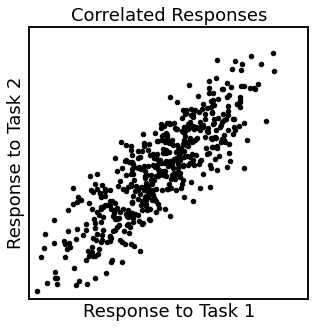

In [11]:
# Visualize the correlated data responses
title_corr = 'Correlated Responses'
plot_dots(correlated_data['d1'], correlated_data['d2'],
          title=title_corr,  figsize=panel_size, **plt_kwargs)

### Uncorrelated Responses

Simulate data that is uncorrelated across tasks.

In [12]:
# Settings for simulated correlated data
corr_null = 0.0
covs_null = [[1, corr_null], [corr_null, 1]]

In [13]:
# Generate the correlated response data (positive correlation)
d1_corr, d2_corr = np.random.multivariate_normal(means, covs_null, n_points).T
uncorrelated_data = {
    'd1' : d1_corr,
    'd2' : d2_corr,
}

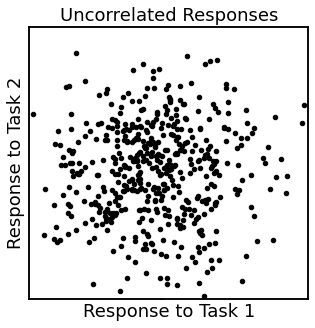

In [14]:
# Visualize the correlated data responses
title_uncorr = 'Uncorrelated Responses'
plot_dots(uncorrelated_data['d1'], correlated_data['d2'],
          title=title_uncorr,  figsize=panel_size, **plt_kwargs)

## H2: Task Specific Responses

Next, we'll simulate responses whereby responses are task specific.

### Single Task Only

First, we will simulate responses cells that only engage in one or the other task.

In [15]:
# Simulated data settings
mean_null = 0.75
scale_null = 0.15
mean_real = 2.5
scale_real = 1

In [16]:
# Simulate task specific responses data
task_specific_data = {
    'd1' : np.concatenate([
        np.random.normal(mean_null, scale_null, size=int(n_points/2)), 
        np.random.normal(mean_real, scale_real, size=int(n_points/2)),
    ]),
    'd2' : np.concatenate([
        np.random.normal(mean_real, scale_real, size=int(n_points/2)),
        np.random.normal(mean_null, scale_null, size=int(n_points/2)),
    ])
}

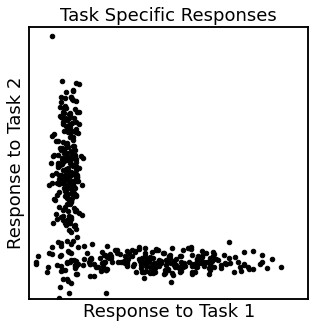

In [17]:
title_specific = 'Task Specific Responses'
plot_dots(task_specific_data['d1'], task_specific_data['d2'],
          title=title_specific,  figsize=panel_size, **plt_kwargs)

### Single Task + Overlap Neurons

Finally, we'll simulate data that is mostly single-task responses, with a subset of overlap responses.

In [18]:
# Simulate data
d1_over, d2_over = np.random.multivariate_normal(means, covs_pos, int(n_points * 1/5)).T
task_overlap_data = {
    'd1' : np.concatenate([
        d1_over,
        np.random.normal(mean_null, scale_null, size=int(n_points * 2/5)), 
        np.random.normal(mean_real, scale_real, size=int(n_points * 2/5)),
    ]),
    'd2' : np.concatenate([
        d2_over,
        np.random.normal(mean_real, scale_real, size=int(n_points * 2/5)),
        np.random.normal(mean_null, scale_null, size=int(n_points * 2/5)),
    ])
}

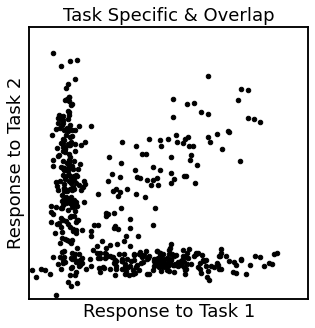

In [19]:
title_overlap = 'Task Specific & Overlap'
plot_dots(task_overlap_data['d1'], task_overlap_data['d2'],
          title=title_overlap, figsize=panel_size, **plt_kwargs)

## Plot All Together

Create a combined multi-axis plot showing all possibilities together.

In [20]:
SAVE_FIG = False

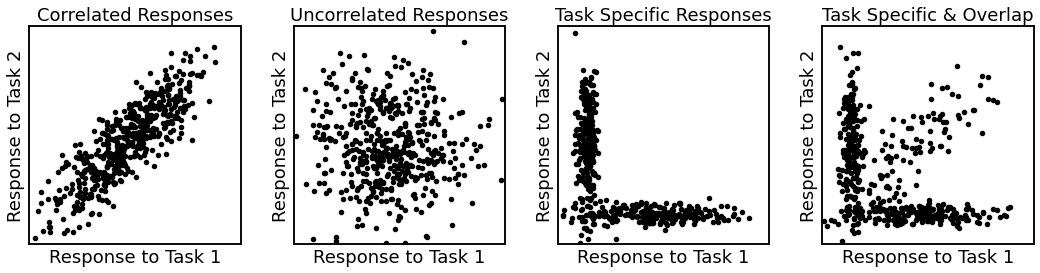

In [21]:
axes = make_axes(4, 4, hspace=0.25, wspace=0.25, figsize=(18, 4))
plot_dots(correlated_data['d1'], correlated_data['d2'],
          title=title_corr, **plt_kwargs, ax=axes[0])
plot_dots(uncorrelated_data['d1'], uncorrelated_data['d2'],
          title=title_uncorr, **plt_kwargs, ax=axes[1])
plot_dots(task_specific_data['d1'], task_specific_data['d2'],
          title=title_specific, **plt_kwargs, ax=axes[2])
plot_dots(task_overlap_data['d1'], task_overlap_data['d2'],
          title=title_overlap, **plt_kwargs, ax=axes[3])
if SAVE_FIG:
    save_figure('hypotheses.pdf')